In [1]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(SCRIPT_DIR)


import numpy as np
import time
import pickle

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from tueplots import bundles

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [2]:
DATA_PATH = os.path.join(SCRIPT_DIR,'data/complexity')
RESULT_PATH = os.path.join(SCRIPT_DIR,'notebooks/results/complexity')

In [3]:
FILE_PATH = os.path.join(DATA_PATH,'times_BOCD_T_mean.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_BOCD_T_mean = pickle.load(handle)

In [4]:
FILE_PATH = os.path.join(DATA_PATH,'times_DSM_T_mean.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_DSM_T_mean = pickle.load(handle)

In [5]:
T = [100, 500, 1000, 5000, 10000, 15000, 20000]

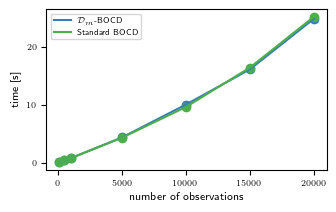

In [6]:
FILE_NAME = 'Complexity_mean_T.pdf'
with plt.rc_context(bundles.icml2022()):
    fig, axs = plt.subplots()

    axs.plot(T,times_DSM_T_mean,c=CB_color_cycle[0],label = '$\mathcal{D}_m$-BOCD')
    axs.plot(T,times_BOCD_T_mean,c=CB_color_cycle[2],label = 'Standard BOCD')

    axs.scatter(T,times_DSM_T_mean,c=CB_color_cycle[0])
    axs.scatter(T,times_BOCD_T_mean,c=CB_color_cycle[2])
    
    axs.set_ylabel('time [s]')
    axs.set_xlabel('number of observations')
    axs.legend()

    fig.savefig(os.path.join(RESULT_PATH, FILE_NAME), format="pdf", bbox_inches= "tight")

In [7]:
FILE_PATH = os.path.join(DATA_PATH,'times_BOCD_D_mean.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_BOCD_D_mean = pickle.load(handle)

In [8]:
FILE_PATH = os.path.join(DATA_PATH,'times_DSM_D_mean.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_DSM_D_mean = pickle.load(handle)

In [9]:
D = [1, 5, 10, 50, 100, 200, 300, 400, 500] 

In [23]:
FILE_NAME = 'Complexity_mean_D.pdf'
with plt.rc_context(bundles.icml2022()):
    fig, axs = plt.subplots()

    axs.plot(D,times_DSM_D_mean,c=CB_color_cycle[0],label = '$\mathcal{D}_m$-BOCD')
    axs.plot(D,times_BOCD_D_mean,c=CB_color_cycle[2],label = 'Standard BOCD')

    axs.scatter(D,times_DSM_D_mean,c=CB_color_cycle[0])
    axs.scatter(D,times_BOCD_D_mean,c=CB_color_cycle[2])
    
    axs.set_ylabel('time [s]')
    axs.set_xlabel('dimensions')
    axs.legend()

    fig.savefig(os.path.join(RESULT_PATH, FILE_NAME), format="pdf", bbox_inches= "tight")

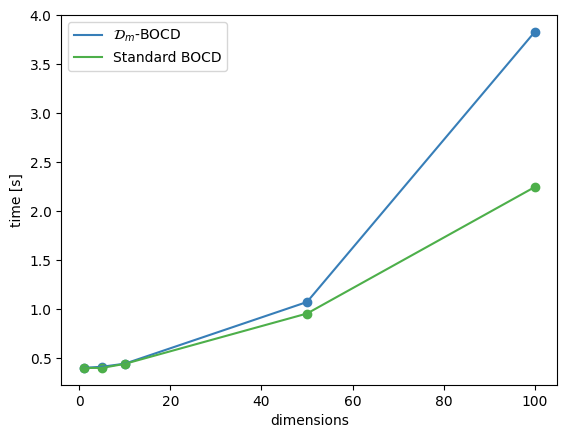

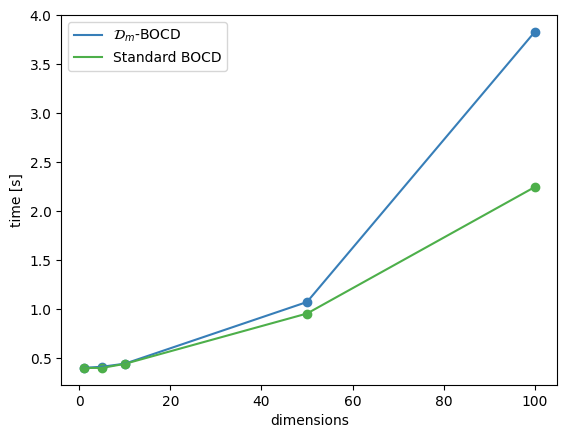

In [11]:
fig, axs = plt.subplots()

axs.plot(D[:-4],times_DSM_D_mean[:-4],c=CB_color_cycle[0],label = '$\mathcal{D}_m$-BOCD')
axs.plot(D[:-4],times_BOCD_D_mean[:-4],c=CB_color_cycle[2],label = 'Standard BOCD')

axs.scatter(D[:-4],times_DSM_D_mean[:-4],c=CB_color_cycle[0])
axs.scatter(D[:-4],times_BOCD_D_mean[:-4],c=CB_color_cycle[2])

axs.set_ylabel('time [s]')
axs.set_xlabel('dimensions')
axs.legend()
plt.show()


In [24]:
FILE_PATH = os.path.join(DATA_PATH,'times_beta_T.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_beta_T = pickle.load(handle)

In [25]:
FILE_PATH = os.path.join(DATA_PATH,'times_BOCD_T.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_BOCD_T = pickle.load(handle)

In [26]:
FILE_PATH = os.path.join(DATA_PATH,'times_DSM_T.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_DSM_T = pickle.load(handle)

In [27]:
T = [100, 500, 1000, 5000, 10000, 15000, 20000]

In [15]:
FILE_NAME = 'Complexity_T.pdf'
with plt.rc_context(bundles.icml2022(column='full')):
    fig, axs = plt.subplots(figsize=(6.75,3))

    axs.plot(T,times_DSM_T,c=CB_color_cycle[0],label = '$\mathcal{D}_m$-BOCD')
    axs.plot(T,times_beta_T,c=CB_color_cycle[1],label = r'$\beta$-BOCD')
    axs.plot(T,times_BOCD_T,c=CB_color_cycle[2],label = 'Standard BOCD')

    axs.scatter(T,times_DSM_T,c=CB_color_cycle[0])
    axs.scatter(T,times_beta_T,c=CB_color_cycle[1])
    axs.scatter(T,times_BOCD_T,c=CB_color_cycle[2])
    axs.set_ylabel('time [s]')
    axs.set_xlabel('number of observations')
    axs.legend()

    axins = zoomed_inset_axes(axs, 6, loc=6) # zoom = 6

    axins.plot(T,times_DSM_T,c=CB_color_cycle[0])
    axins.plot(T,times_beta_T,c=CB_color_cycle[1])
    axins.plot(T,times_BOCD_T,c=CB_color_cycle[2])

    axins.scatter(T,times_DSM_T,c=CB_color_cycle[0])
    axins.scatter(T,times_beta_T,c=CB_color_cycle[1])
    axins.scatter(T,times_BOCD_T,c=CB_color_cycle[2])

    plt.xticks(visible=False)
    plt.yticks(visible=False)

    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
    mark_inset(axs, axins, loc1=2, loc2=4, fc="none", ec="0.4")


    axins.set_xlim(0, 1100)
    axins.set_ylim(-50, 600)

    fig.savefig(os.path.join(RESULT_PATH, FILE_NAME), format="pdf", bbox_inches= "tight")

In [16]:
FILE_PATH = os.path.join(DATA_PATH,'times_beta_D.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_beta_D = pickle.load(handle)

In [17]:
FILE_PATH = os.path.join(DATA_PATH,'times_BOCD_D.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_BOCD_D = pickle.load(handle)

In [18]:
FILE_PATH = os.path.join(DATA_PATH,'times_DSM_D.pickle')
with open(FILE_PATH, 'rb') as handle:
    times_DSM_D = pickle.load(handle)

In [19]:
D = [1, 5, 10, 20, 30, 40, 50] # data dimension.

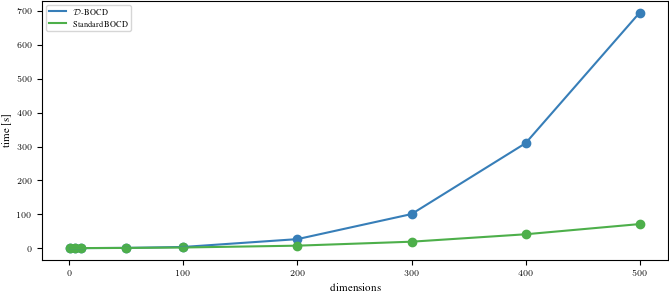

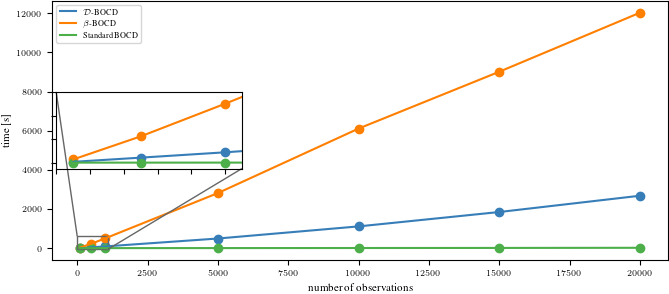

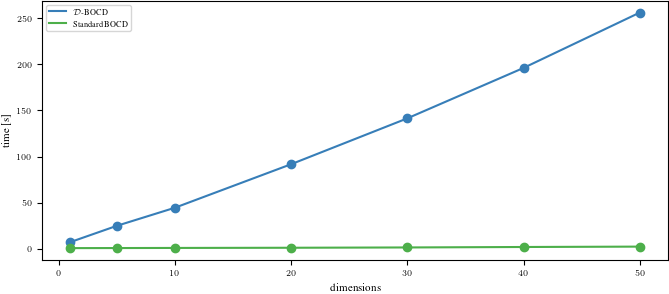

In [20]:
FILE_NAME = 'Complexity_D.pdf'
with plt.rc_context(bundles.icml2022(column='full')):
    fig, axs = plt.subplots(figsize=(6.75,3))

    axs.plot(D,times_DSM_D,c=CB_color_cycle[0],label = '$\mathcal{D}$-BOCD')
    #axs.plot(D,times_beta_D,c=CB_color_cycle[1],label = r'$\beta$-BOCD')
    axs.plot(D,times_BOCD_D,c=CB_color_cycle[2],label = 'Standard BOCD')

    axs.scatter(D,times_DSM_D,c=CB_color_cycle[0])
    #axs.scatter(D,times_beta_D,c=CB_color_cycle[1])
    axs.scatter(D,times_BOCD_D,c=CB_color_cycle[2])
    
    axs.set_ylabel('time [s]')
    axs.set_xlabel('dimensions')
    
    axs.legend()
    
    plt.show()

    fig.savefig(os.path.join(RESULT_PATH, FILE_NAME), format="pdf", bbox_inches= "tight")